# Data Acquisition

In [60]:
import scholarly
import pandas as pd

def get_pubs(name, school):
    """Extract from Google Scholar all publications for a given person"""
    search_query = scholarly.search_author(name + " " + school)
    try:
        author = next(search_query).fill()
        listt = [author.publications[0].bib['title'],author.publications[1].bib['title']]
        try:
            listy = [author.publications[0].bib['year'],author.publications[1].bib['year']]
        except:
            listy = [0,0]
        for i in range(len(author.publications)):
            listt.append(author.publications[i].bib['title'])
            try: 
                listy.append(author.publications[i].bib['year'])
            except:
                listy.append(0)
        df = pd.DataFrame({"title": listt[2:], "year":listy[2:]})
        df.insert(0, "school", school)
        df.insert(1, "name", name.split[-1])
    except:
        print("No profile for", name)
        df = pd.DataFrame()
    return df;   

In [1]:
davis_profs = ["Trish Berger", "Richard A. Blatchford", "David Bunn", "Hao Cheng",
               "Fred S. Conte", "Anna C. Denicol", "Mary E. Delany", "Edward J. DePeters",
               "John Eadie", "James Fadel", "Jackson Gross", "Matthias Hess", 
               "Kristina Horback", "Russ Hovey", "Josh Hull", "Silas Hung", 
               "Ermias Kebreab", "Annie J. King", "Kirk Klasing", "Dietmar Kueltz",  
               "Yanhong Liu", "Elizabeth A. Maga", "Maja M. Makagon", "Bernie May", 
               "Juan F. Medrano", "Deanne Meyer", "Michael J. Mienaltowski", 
               "Michael R. Miller", "Frank Mitloehner", "James D. Murray", 
               "Anita M. Oberbauer",  "James W. Oltjen", "Lee Allen Pettey", 
               "Peter H. Robinson", "Pablo J. Ross", "Roberto D. Sainz", "Andrea Schreier", 
               "Anne E. Todgham", "Cassandra B. Tucker", "Alison Van Eenennaam", 
               "Jason V. Watters", "Crystal Yang", "Huaijun Zhou", "Richard A. Zinn"]

cornell_profs = ["Yves Boisclair", "Dan Brown", "Walter Butler", "Debbie Cherney", 
                "Jerrie Gavalchin", "Julio Giordano", "Heather Huson", 
                "Patricia Johnson", "Quirine Ketterings", "Xin Gen Lei", 
                "Joseph McFadden", "Thomas Overton", "Susan Quirk", "Vimal Selvaraj",
                "Michael Thonney", "Michael Van Amburgh"]

tamu_profs = ["Ashley Arnold", "Jason Banta", "Fuller Bazer", "Rodolfo Cardoso",
             "Bruce Carpenter", "Gordon Carstens", "Alejandro Castillo", "Jason Cleere",
             "Reinaldo Cooke", "H Russell Cross", "Courtney Daigle", "Kathrin Dunlap", 
             "Davis Forrest", "Kerri Gehring", "Clare Gill", "Jason Gill", "Ron Gill", 
             "Davey Griffin", "Thomas Hairgrove", "Dan Hale", "Steve Hammack", "Andy Herring",
             "Nancy Ing", "Jenny Jennings", "Ellen Jordan", "Chris Kerth", "G Cliff Lamb", 
             "Jessica Leatherwood", "Charles Long", "Ted McCollum", "Rhonda Miller",
             "Wes Osburn", "Joe Paschal", "Shawn Ramsey", "Ron Randel", "Reid Redden", 
             "Penny Riggs", "David Riley", "Jim Sanders", "Carey Satterfield", "Jeff Savell",
             "Chris Skaggs", "Stephen B. Smith", "Matthew Taylor", "Luis Tedeschi", 
             "Daniel Waldron", "Thomas H Welsh", "Sarah White", "Travis Whitney", 
             "Tryon Wickersham", "Gary Williams", "Guoyao Wu"]

ohio_profs = ["Lisa Bielke", "Stephen Boyles", "Daniel Clark", "Kimberly Cole", 
             "Michael Cressman", "Michael Davis", "Maurice Eastridge", "Thaddeus Ezeji",
             "Jeffrey Firkins", "John Foltz", "Lyda Garcia", "Alvaro Garcia Guerra",
             "Kelly George", "Sheila Jacobi", "Justin Kieffer", "Chanhee Lee", "Kichoon Lee",
             "Michael Lilburn", "Pasha Lyvers Peffer", "Steven Moeller", "Luis Moraes", 
             "Herbert Ockerman", "Joseph Ottobre", "Monique Pairis-Garcia", "Elizabeth Parker", 
             "Tony Parker", "William Pope", "Alejandro Relling", "Ramesh Selvaraj",
             "Sandra Velleman", "William Weiss", "Macdonald Wick", "Zhongtang Yu"]

florida_profs = ["Adegbola Adesogan", "John Arthington", "Mario Binelli", "Jeremy Block", 
                "John Bromfield", "Samantha A. Brooks", "Ilaria Capua", "Chad Carr", 
                "Geoff Dahl", "Albert De Vries", "Nicholas DiLorenzo", "John P. Driver", 
                "Mauricio Elzo", "Antonio Faciola", "Luiz Ferraretto", "Timothy J. Hackmann",
                "Peter Hansen", "H. Arie Havelaar", "Matthew Hersom", "Kwang Cheol Jeong",
                "Jimena Laporta", "Raluca Mateescu", "Joel McQuagge", "Emily K. Miller-Cushon",
                "Philipe Moriel", "Corwin D. Nelson", "Pascal Oltenacu", 
                "Francisco Penagaricano", "Jose Eduardo Santos", "Jason M. Scheffler",
                "Tracy L. Scheffler", "Charlie Staples", "Saundra TenBroeck", "Todd Thrift", 
                "Lori Warren", "Carissa Wickens", "Sally Williams", "Stephanie Wohlgemuth"]

In [6]:
print("There are", len(davis_profs), "professors from Davis")
print("There are", len(cornell_profs), "professors from Cornell")
print("There are", len(tamu_profs), "professors from Texas A&M")
print("There are", len(ohio_profs), "professors from Ohio State")
print("There are", len(florida_profs), "professors from Florida State")

print("The total is", len(davis_profs) + len(cornell_profs) + len(tamu_profs) + len(ohio_profs) + len(florida_profs))


There are 44 professors from Davis
There are 16 professors from Cornell
There are 52 professors from Texas A&M
There are 33 professors from Ohio State
There are 38 professors from Florida State
The total is 183


In [242]:
def get_school(profs_list, school):
    """Proccesses all the professors for a given school"""
    global schooldf
    for x in profs_list:
        df = get_pubs(x, school)
        schooldf = schooldf.append(df)
    return;

In [250]:
# Use the first item to initialize the data frame
schooldf = get_pubs("Trish Berger", "Davis") 

In [ ]:
get_school(davis_profs[1:], "Davis") # Skip the first one to avoid duplicates
get_school(cornell_profs, "Cornell")
get_school(tamu_profs, "TAMU")
get_school(ohio_profs, "Ohio")
get_school(flordia_profs, "Florida")

# Save data in case Google scholar makes changes that break the package I'm using
schooldf.to_csv("data.txt", sep=' ', index=False, header=False)

In [267]:
schooldf.dtypes

school    object
name      object
title     object
year       int64
dtype: object

In [259]:
# Make a copy
school_copy = schooldf.copy

In [262]:
# Get rid of rows that are mistakes (including 0)
schooldf = schooldf.append(df)
schooldf = schooldf[schooldf.year > 1960]

In [263]:
# Count up the total number of publications for each professor
c = pd.DataFrame(schooldf.groupby(['school','name'])['title'].size())
c = c.reset_index()
c.columns = ["school1", "name1", "count"]

# Get the year of the first paper for each professor
s = pd.DataFrame(schooldf.groupby(['school','name'])['year'].min())
s = s.reset_index()
s.columns = ["school2", "name2", "year"]

total = pd.concat([c,s], axis = 1)
total = total.drop(total.columns[[3,4]], axis=1)
total.columns = ["school","name","count","year"]
total

,school,name,count,year
0,Cornell,Amburgh,188,1981
1,Cornell,Ketterings,103,1997
2,Davis,Berger,157,1979
3,Davis,Cheng,583,1981
4,Davis,Eadie,121,1979
5,Davis,Horback,42,2010
6,Davis,Kebreab,431,1999
7,Davis,Kueltz,110,1991
8,Davis,Liu,41,2006
9,Davis,Makagon,31,2005


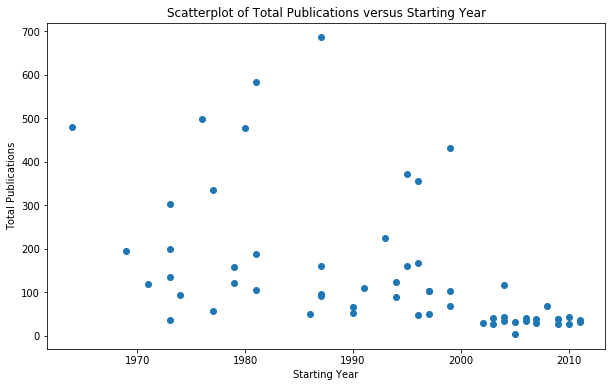

In [264]:
plt.scatter(x = "year", y = "count", data=total)
plt.title("Scatterplot of Total Publications versus Starting Year")
plt.ylabel("Total Publications")
plt.xlabel("Starting Year")

plt.show()

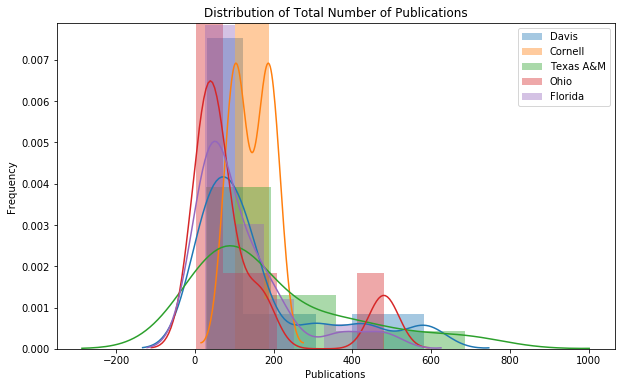

In [265]:
davis = total[total.school=="Davis"]["count"]
cornell = total[total.school=="Cornell"]["count"]
tamu = total[total.school=="TAMU"]["count"]
ohio = total[total.school=="Ohio"]["count"]
florida = total[total.school=="Florida"]["count"]

d = sns.distplot(davis)
sns.distplot(cornell)
sns.distplot(tamu)
sns.distplot(ohio)
sns.distplot(florida)
d.set(title = "Distribution of Total Number of Publications", 
      xlabel = "Publications", ylabel = "Frequency")
plt.legend(["Davis","Cornell", "Texas A&M", "Ohio", "Florida"]) 

plt.show()